In [2]:
import numpy as np
import pandas as pd


In [4]:
fake_news = pd.read_csv('Fake.csv')
true_news = pd.read_csv('True.csv')

true_news.head()
true_news.shape


(21417, 4)

In [5]:
fake_news.head()
fake_news.shape


(23481, 4)

In [4]:
fake_news.shape

(23481, 4)

In [5]:
true_news.shape

(21417, 4)

In [6]:
#3 Data Pre-processing

fake_news['isTrue'] = 0
true_news['isTrue'] = 1

In [7]:
df = pd.concat([fake_news, true_news], axis=0)

In [8]:
df.head()

,title,text,subject,date,isTrue
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [9]:
df.tail()

,title,text,subject,date,isTrue
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [10]:
df = df.drop(['title', 'subject', 'date'], axis=1)

In [11]:
df.head()

,text,isTrue
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


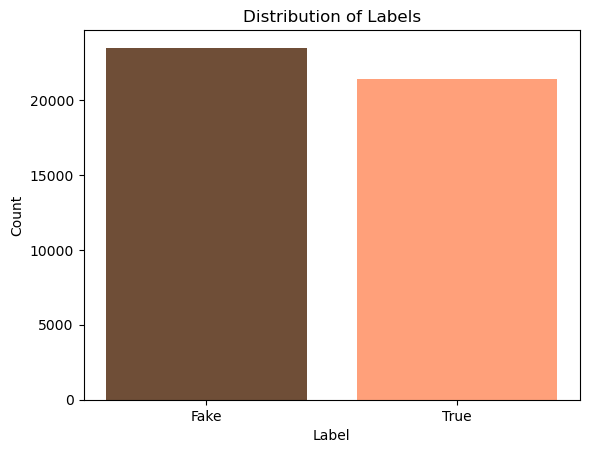

In [12]:
import matplotlib.pyplot as plt

#4 Data Visualisation
label_counts = df['isTrue'].value_counts()
plt.bar(label_counts.index, label_counts.values, color=['#6F4E37', '#FFA07A'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.xticks([0, 1], ['Fake', 'True'])
plt.show()


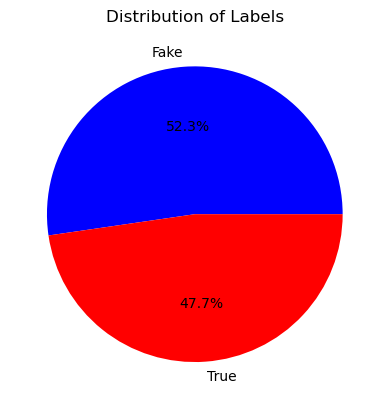

In [13]:
import matplotlib.pyplot as plt

# 4 Data Visualization - Pie Chart
label_counts = df['isTrue'].value_counts()
plt.pie(label_counts, labels=['Fake', 'True'], colors=['blue', 'red'], autopct='%1.1f%%')
plt.title('Distribution of Labels')
plt.show()


In [14]:
#5 Cleaning text to remove any unwanted strings

import re
import string

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]|\W|https?://\S+|www\.\S+|<.*?>+|\n|\w*\d\w*', '', text)
    return text

df["text"] = df["text"].apply(preprocess_text)


In [15]:
#6 Prepare Data for Modeling

x = df["text"] #the features or input data. 
y = df["isTrue"] #target variable or labels.

In [16]:
#7 Divide the dataset into 80:20 for training and testing

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [17]:
#8 Before training model converting text data to vectors

from sklearn.feature_extraction.text import TfidfVectorizer
#converts a collection of raw documents (text) into a matrix of TF-IDF features. 
#TF-IDF stands for Term Frequency-Inverse Document Frequency
#which is a statistical measure used to evaluate the importance of a word in a document relative to a collection of documents.


vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

#Each row of this matrix represents a news article, and each column represents a unique term from the vocabulary.

#TF-IDF is a powerful technique for representing text data in a numerical format that captures the importance of terms within documents and across the entire corpus. 
#Its use is prevalent in various NLP applications due to its effectiveness in handling text data and improving the performance of machine learning models.








In [18]:
#7 Divide the dataset into 80:20 for training and testing

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [19]:
#9 Training a LogisticRegression Model

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xv_train,y_train)
pred_lr = lr.predict(xv_test)


from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
print("Logistic Regression:")

logistic_regression_accuracy = accuracy_score(y_test, pred_lr)
print("Accuracy:\n", logistic_regression_accuracy)

print("Confusion Matrix:\n",confusion_matrix(y_test, pred_lr))

print("Classification_report:\n",classification_report(y_test, pred_lr))

Logistic Regression:
Accuracy:
 0.5139198218262806
Confusion Matrix:
 [[4216  438]
 [3927  399]]
Classification_report:
               precision    recall  f1-score   support

           0       0.52      0.91      0.66      4654
           1       0.48      0.09      0.15      4326

    accuracy                           0.51      8980
   macro avg       0.50      0.50      0.41      8980
weighted avg       0.50      0.51      0.42      8980



In [20]:
#Support vector machine model

from sklearn.svm import SVC

svm = SVC()
svm.fit(xv_train, y_train)
pred_svm = svm.predict(xv_test)

print("Support Vector Machine (SVM):")

svm_accuracy = accuracy_score(y_test, pred_svm)
print("Accuracy:", svm_accuracy)

print("Confusion Matrix:\n",confusion_matrix(y_test, pred_svm))

print("Classification_report:\n",classification_report(y_test, pred_svm))


Support Vector Machine (SVM):
Accuracy: 0.5139198218262806
Confusion Matrix:
 [[4216  438]
 [3927  399]]
Classification_report:
               precision    recall  f1-score   support

           0       0.52      0.91      0.66      4654
           1       0.48      0.09      0.15      4326

    accuracy                           0.51      8980
   macro avg       0.50      0.50      0.41      8980
weighted avg       0.50      0.51      0.42      8980



In [ ]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(xv_train, y_train)
pred_dt = dt.predict(xv_test)

print("Decision Tree Classifier:")

decision_tree_accuracy = accuracy_score(y_test, pred_dt)
print("Accuracy:\n", decision_tree_accuracy)

print("Confusion Matrix:\n",confusion_matrix(y_test, pred_dt))

print("Classification_report:\n",classification_report(y_test, pred_dt))


In [ ]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier()
rf.fit(xv_train, y_train)
pred_rf = rf.predict(xv_test)

print("Random Forest Classifier:")

random_forest_accuracy = accuracy_score(y_test, pred_rf)
print("Accuracy:", random_forest_accuracy)

print("Confusion Matrix:\n",confusion_matrix(y_test, pred_rf))

print("Classification_report:\n",classification_report(y_test, pred_rf))


In [ ]:
#K-Nearest Neighbors (KNN)

from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier()
knn.fit(xv_train, y_train)
pred_knn = knn.predict(xv_test)

print("K-Nearest Neighbors (KNN):")

knn_accuracy = accuracy_score(y_test, pred_knn)
print("Accuracy:", knn_accuracy)

print("Confusion Matrix:\n",confusion_matrix(y_test, pred_knn))

print("Classification_report:\n",classification_report(y_test, pred_knn))


In [ ]:
#Gradient Boosting Classifier
#combines the predictions of multiple weak learners, typically decision trees, sequentially.

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

gb = GradientBoostingClassifier()
gb.fit(xv_train, y_train)
pred_gb = gb.predict(xv_test)

print("Gradient Boosting Classifier:")

gbm_accuracy = accuracy_score(y_test, pred_gb)
print("Accuracy:", gbm_accuracy)

print("Confusion Matrix:\n",confusion_matrix(y_test, pred_gb))

print("Classification_report:\n",classification_report(y_test, pred_gb))


In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores for each classifier
accuracies = [svm_accuracy, decision_tree_accuracy, gbm_accuracy, knn_accuracy, logistic_regression_accuracy, random_forest_accuracy]

# Classifier names
classifier_names = ["SVM", "Decision Tree", "GBM", "KNN", "Logistic Regression", "Random Forest"]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(classifier_names, accuracies, color='skyblue')
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Classifier Accuracy Comparison")
plt.ylim(0, 1)  # Set y-axis limits (0 to 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', va='bottom')

plt.show()
